# Importing the necessary libraries

In [15]:
### For data manipulation and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Libraries for predictive analysis
from mlxtend.frequent_patterns import apriori

## Reading the dataset after preprocessing

In [16]:
#Reading the csv file....
df = pd.read_csv('BDP_Cleaned.csv')
df.tail(10)

,CGPA_Class,Gender,V1-1_(1),Time_Day_Watched_(V1-1),Student_Rating_(V1-1),V1-2_(1),Time_Day_Watched_(V1-2),Student_Rating_(V1-2),V1-3_(1),Time_Day_Watched_(V1-3),...,part_day_V1-3,part_day_V1-4,part_day_V2-1,part_day_V2-2,part_day_V2-3,part_day_V2-4,part_day_V3-1,part_day_V3-2,part_day_V3-3,part_day_V3-4
101,3.67 - 4.00,Male,6,2021-09-07 21:42:00,Satisfactory,50.0,2021-09-08 05:01:00,Satisfactory,25.0,2021-09-07 22:27:00,...,night,night,night,midnight,midnight,midnight,midnight,midnight,midnight,midnight
102,2.67 - 3.32,Male,7,2021-09-05 12:30:00,Satisfactory,50.0,2021-09-08 10:40:00,Satisfactory,22.0,2021-09-05 16:21:00,...,afternoon,morning,midnight,morning,afternoon,afternoon,morning,afternoon,midnight,afternoon
103,3.33 - 3.66,Male,6,2021-09-08 00:28:00,Excellent,50.0,2021-09-08 00:07:00,Excellent,22.0,2021-09-07 21:46:00,...,night,night,midnight,night,night,night,midnight,night,night,night
104,2.67 - 3.32,Male,6,2021-09-07 23:34:00,Very Good,50.0,2021-09-08 00:36:00,Satisfactory,22.0,2021-09-08 00:59:00,...,midnight,midnight,night,night,night,night,night,night,night,night
105,3.67 - 4.00,Male,6,2021-09-07 17:11:00,Very Good,50.0,2021-09-07 17:46:00,Excellent,22.0,2021-09-07 17:20:00,...,afternoon,afternoon,afternoon,afternoon,afternoon,afternoon,afternoon,afternoon,afternoon,afternoon
106,2.67 - 3.32,Male,6,2021-09-07 22:41:00,Excellent,0.0,2021-01-28 22:13:00,Poor (never watch it),0.0,2021-01-28 22:14:00,...,night,night,night,night,night,night,night,morning,night,morning
107,3.33 - 3.66,Male,6,2021-09-08 10:57:00,Excellent,0.0,2021-01-28 22:13:00,Poor (never watch it),22.0,2021-09-08 11:13:00,...,morning,morning,morning,morning,morning,morning,morning,morning,morning,morning
108,3.67 - 4.00,Male,6,2021-09-04 22:44:00,Excellent,50.0,2021-09-04 15:40:00,Fair,22.0,2021-09-04 14:49:00,...,afternoon,afternoon,night,afternoon,afternoon,afternoon,night,midnight,afternoon,midnight
109,3.67 - 4.00,Male,8,2021-09-05 21:41:00,Satisfactory,50.0,2021-09-06 02:22:00,Excellent,22.0,2021-09-05 22:08:00,...,night,night,night,midnight,night,midnight,midnight,midnight,midnight,midnight
110,2.67 - 3.32,Male,6,2021-09-07 13:27:00,Excellent,50.0,2021-09-07 11:49:00,Fair,22.0,2021-09-07 15:23:00,...,afternoon,afternoon,afternoon,afternoon,morning,morning,morning,afternoon,morning,morning


## Filtering non numeric features from dataset

In [17]:
#Filtering numerical columns...
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
newdf.head()

,V1-1_(1),V1-2_(1),V1-3_(1),V1-4_(1),V1_PercentWatched,V2-1_(2),V2-2_(2),V2-3_(2),V2-4_(2),V2_PercentWatched,...,S/I_Score,Sensing,Intuitive,Vi/Vb_Score,Visual,Verbal,S/G_Score,Sequential,Global,Quiz
0,6,50.0,22.0,5,100.0,13,35.0,12.0,7.0,100.000000,...,3,1,0,7,1,0,1,1,0,10
1,6,50.0,22.0,5,100.0,13,35.0,12.0,7.0,100.000000,...,9,1,0,7,1,0,3,0,1,8
2,6,50.0,22.0,5,100.0,13,35.0,12.0,7.0,100.000000,...,7,1,0,7,1,0,3,0,1,6
3,6,50.0,22.0,5,100.0,15,60.0,12.0,7.0,140.298507,...,3,1,0,7,1,0,1,1,0,5
4,6,50.0,22.0,5,100.0,13,35.0,12.0,7.0,100.000000,...,1,1,0,5,1,0,3,0,1,8


## Data Modelling
### Association Rule Mining
#### Getting all 4 boolean features for each learning style dimension

In [18]:
df2 = newdf[['Active', "Sensing", "Visual", "Sequential"]].copy()

In [19]:
df2.head()

,Active,Sensing,Visual,Sequential
0,1,1,1,1
1,0,1,1,0
2,0,1,1,0
3,0,1,1,1
4,1,1,1,0


In [20]:
x = list(df2.columns)
x

['Active', 'Sensing', 'Visual', 'Sequential']

# Encoding boolean values of each dimension 1/0 with respective style value

In [21]:
#df2.head(50)
df2.iloc[:,0] = df2.iloc[:,0].replace([1,0],['Active','Reflective'])
df2.iloc[:,1] = df2.iloc[:,1].replace([1,0],['Sensing','Intuitive'])
df2.iloc[:,2] = df2.iloc[:,2].replace([1,0],['Visual','Verbal'])
df2.iloc[:,3] = df2.iloc[:,3].replace([1,0],['Sequential','Global'])

# What count of learning style combination do each of the students exhibit.

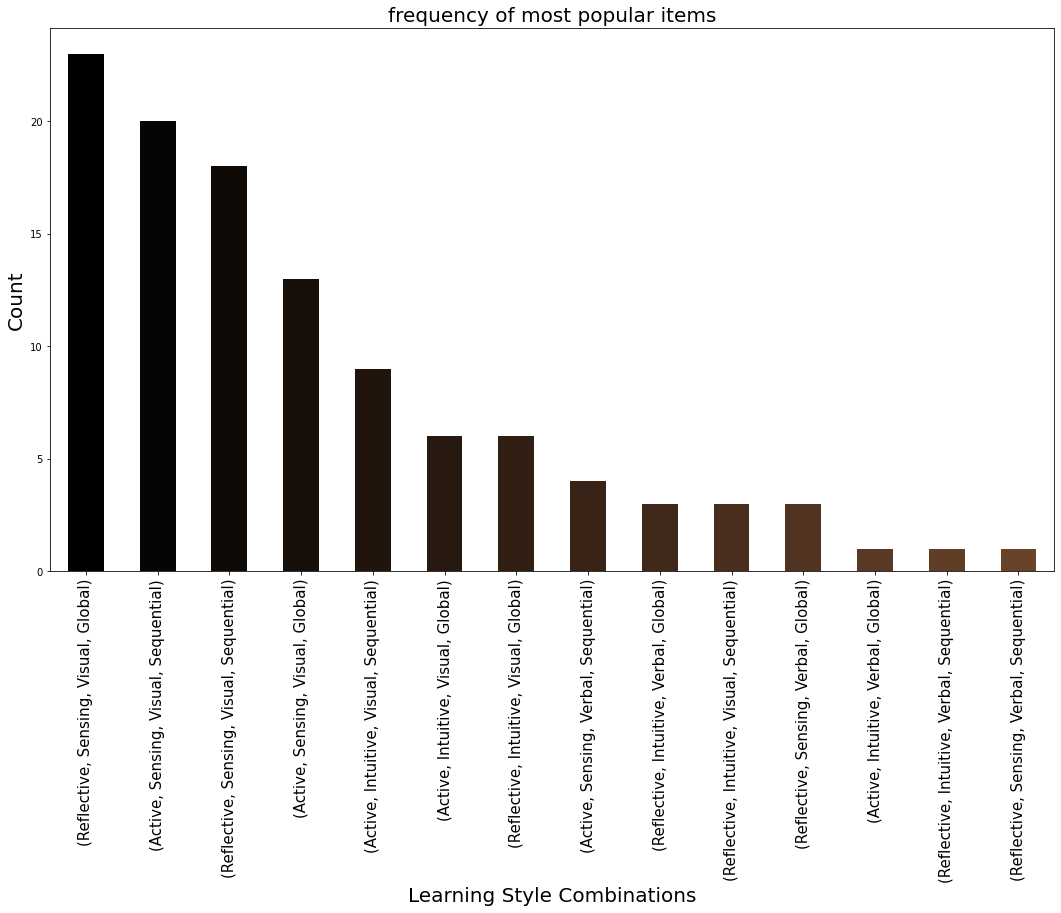

In [22]:
plt.rcParams['figure.figsize'] = (18, 10)
color = plt.cm.copper(np.linspace(0, 1, 40))
df2.value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xlabel('Learning Style Combinations', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(rotation = 90, fontsize=15 )
plt.show()

# Converting the data into a numpy array format for encoding

In [23]:
trans = []
for i in range(0, 111):
    trans.append([str(df2.values[i,j]) for j in range(0,4)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(111, 4)


# Encoding data using transaction encoder with `True / False` values to be fit into apriori algorithm

In [24]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
df2 = te.fit_transform(trans)
df2 = pd.DataFrame(df2, columns = te.columns_)

# getting the shape of the data
df2

,Active,Global,Intuitive,Reflective,Sensing,Sequential,Verbal,Visual
0,True,False,False,False,True,True,False,True
1,False,True,False,True,True,False,False,True
2,False,True,False,True,True,False,False,True
3,False,False,False,True,True,True,False,True
4,True,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...
106,True,True,False,False,True,False,False,True
107,True,True,False,False,True,False,False,True
108,True,True,True,False,False,False,False,True
109,True,False,False,False,True,True,True,False


# Getting support of items that have minimum of 5% support

In [11]:
from mlxtend.frequent_patterns import apriori

In [12]:
#frequent_itemsets
frequent_itemsets = apriori(df2, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [13]:
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0) ]

,support,itemsets,length
0,0.477477,(Active),1
1,0.495495,(Global),1
2,0.261261,(Intuitive),1
3,0.522523,(Reflective),1
4,0.738739,(Sensing),1
5,0.504505,(Sequential),1
6,0.117117,(Verbal),1
7,0.882883,(Visual),1


In [14]:
frequent_itemsets[ (frequent_itemsets['length'] == 4) &
                   (frequent_itemsets['support'] >= 0) ]

,support,itemsets,length
50,0.054054,"(Intuitive, Global, Visual, Active)",4
51,0.117117,"(Global, Sensing, Visual, Active)",4
52,0.081081,"(Intuitive, Sequential, Visual, Active)",4
53,0.180180,"(Sequential, Sensing, Visual, Active)",4
54,0.054054,"(Intuitive, Reflective, Visual, Global)",4
55,0.207207,"(Reflective, Sensing, Visual, Global)",4
56,0.162162,"(Sequential, Reflective, Visual, Sensing)",4
